In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("loan_approval_data.csv")

In [3]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [4]:
c_cols = df.select_dtypes(include=["object"]).columns
n_cols = df.select_dtypes(include=["number"]).columns

In [5]:
c_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [6]:
n_cols

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [7]:
from sklearn.impute import SimpleImputer
num_imp = SimpleImputer(strategy="mean")
df[n_cols]=num_imp.fit_transform(df[n_cols])

In [8]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [9]:
cat_imp = SimpleImputer(strategy="most_frequent")
df[c_cols]=cat_imp.fit_transform(df[c_cols])

In [10]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [11]:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

# EDA-exploratory data analysis


Text(0.5, 1.0, 'Is Loan approved or not?')

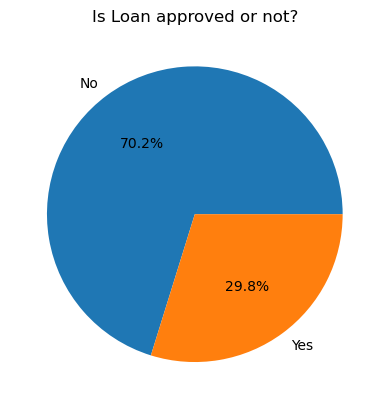

In [12]:
cls_count = df["Loan_Approved"].value_counts()
plt.pie(cls_count,labels=["No","Yes"],autopct="%1.1f%%")
plt.title("Is Loan approved or not?")

[Text(0, 0, '621'), Text(0, 0, '379')]

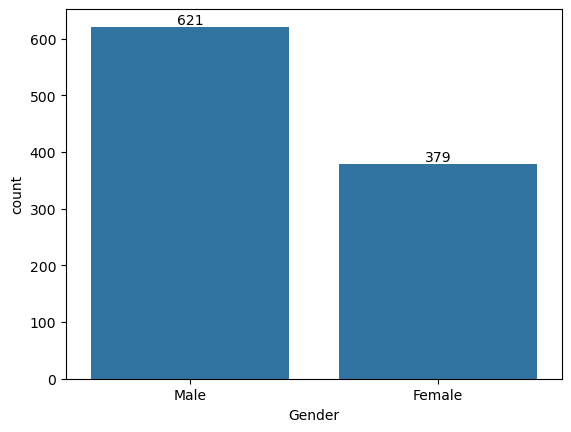

In [13]:
gen_count = df["Gender"].value_counts()
ax = sns.barplot(gen_count)
ax.bar_label(ax.containers[0])

[Text(0, 0, '722'), Text(0, 0, '278')]

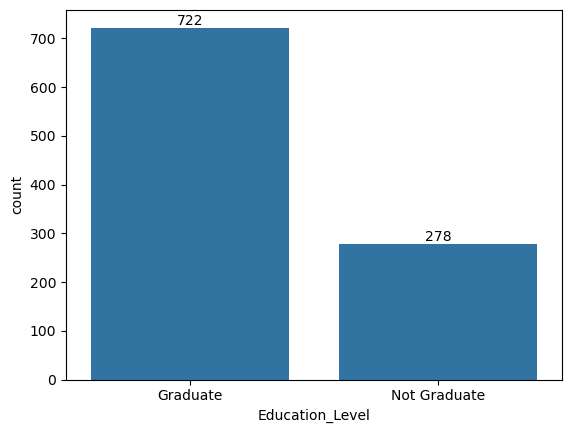

In [14]:
edu_count = df["Education_Level"].value_counts()
ax = sns.barplot(edu_count)
ax.bar_label(ax.containers[0])

[Text(0, 0, '643'), Text(0, 0, '357')]

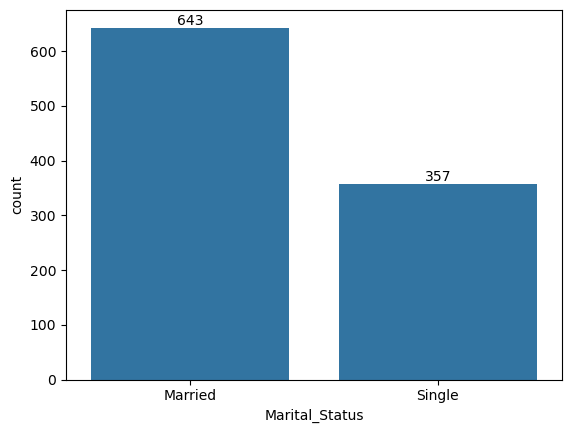

In [15]:
m_count = df["Marital_Status"].value_counts()
ax = sns.barplot(m_count)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Applicant_Income', ylabel='Count'>

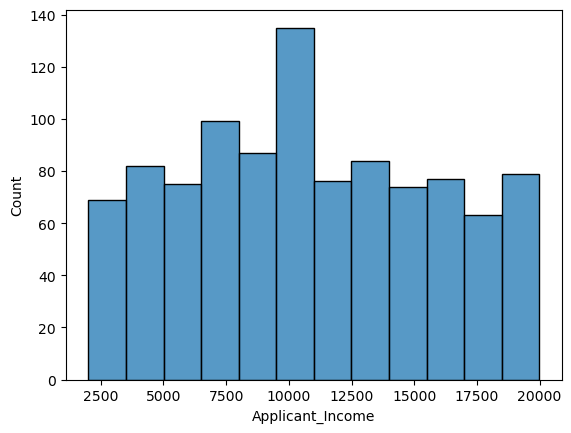

In [16]:
sns.histplot(
    data = df,
    x="Applicant_Income"
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

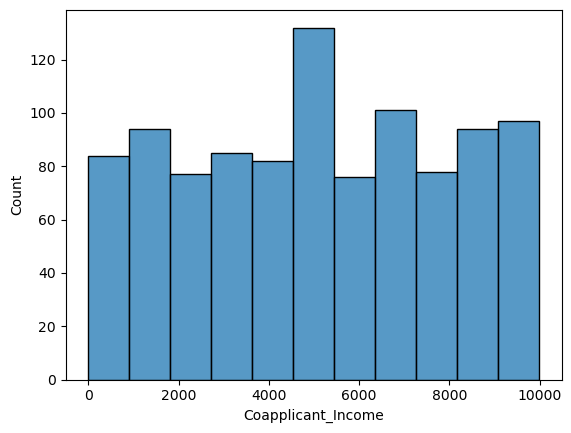

In [17]:
sns.histplot(
    data = df,
    x = "Coapplicant_Income"
)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

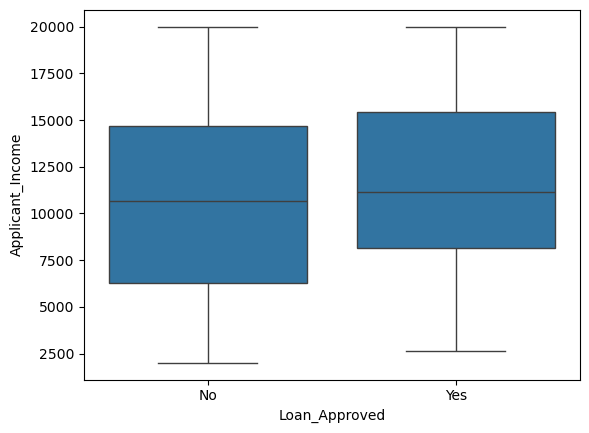

In [18]:
sns.boxplot(
    data = df,
    x = "Loan_Approved",
    y = "Applicant_Income"
)

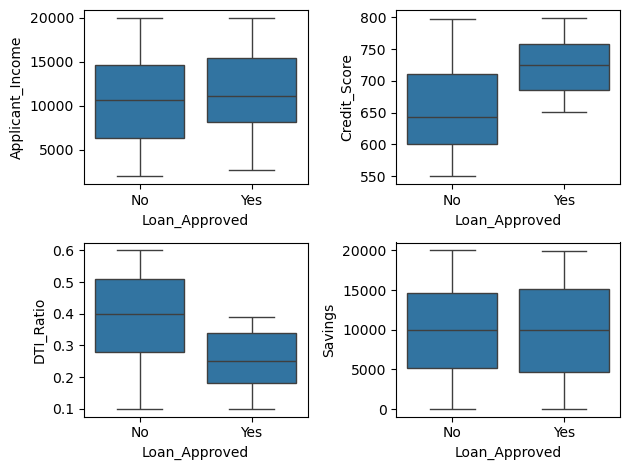

In [19]:
figs,axes = plt.subplots(2,2)
sns.boxplot(ax=axes[0,0],data = df,x="Loan_Approved",y="Applicant_Income")
sns.boxplot(ax=axes[0,1],data = df,x="Loan_Approved",y="Credit_Score")
sns.boxplot(ax=axes[1,0],data = df,x="Loan_Approved",y="DTI_Ratio")
sns.boxplot(ax=axes[1,1],data = df,x="Loan_Approved",y="Savings")
plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

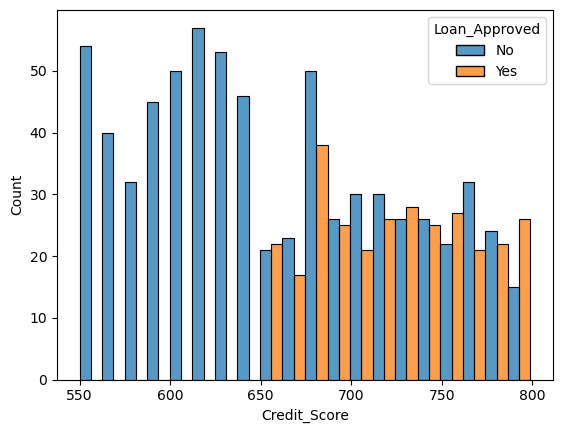

In [20]:
sns.histplot(
    data = df,
    x = "Credit_Score",
    hue = "Loan_Approved",
    bins=20,
    multiple = "dodge"
)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

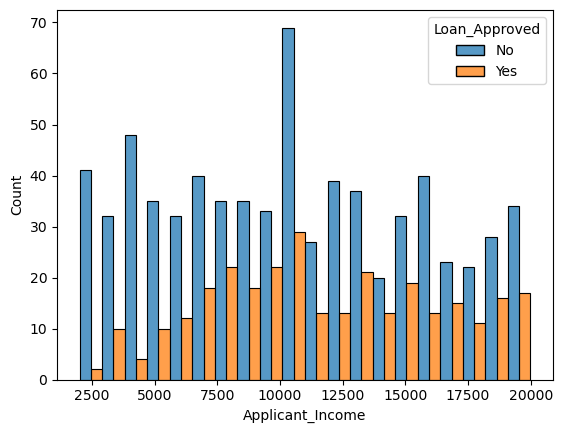

In [21]:
sns.histplot(
    data = df,
    x = "Applicant_Income",
    hue = "Loan_Approved",
    bins=20,
    multiple = "dodge"
)

In [22]:
df.drop("Applicant_ID",axis=1)

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.000000,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.000000,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.000000,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.000000,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.000000,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.000000,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.000000,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.000000,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.000000,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.000000,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10852.571579,9092.0,Salaried,58.0,Married,0.0,557.0,0.0,0.59,5370.000000,43563.0,8311.0,72.0,Personal,Urban,Not Graduate,Male,Unemployed,No
996,3279.000000,6356.0,Self-employed,58.0,Married,1.0,646.0,3.0,0.19,9940.452632,18361.0,22563.0,12.0,Business,Urban,Graduate,Female,Government,No
997,15192.000000,8433.0,Contract,48.0,Single,1.0,666.0,1.0,0.40,8581.000000,41335.0,16203.0,24.0,Home,Rural,Graduate,Male,MNC,No
998,9083.000000,7380.0,Unemployed,50.0,Single,1.0,748.0,3.0,0.31,13491.000000,8933.0,10290.0,36.0,Personal,Urban,Graduate,Male,Private,Yes


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        1000 non-null   float64
 1   Applicant_Income    1000 non-null   float64
 2   Coapplicant_Income  1000 non-null   float64
 3   Employment_Status   1000 non-null   object 
 4   Age                 1000 non-null   float64
 5   Marital_Status      1000 non-null   object 
 6   Dependents          1000 non-null   float64
 7   Credit_Score        1000 non-null   float64
 8   Existing_Loans      1000 non-null   float64
 9   DTI_Ratio           1000 non-null   float64
 10  Savings             1000 non-null   float64
 11  Collateral_Value    1000 non-null   float64
 12  Loan_Amount         1000 non-null   float64
 13  Loan_Term           1000 non-null   float64
 14  Loan_Purpose        1000 non-null   object 
 15  Property_Area       1000 non-null   object 
 16  Educati

# Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [25]:
le = LabelEncoder()
df["Education_Level"]=le.fit_transform(df["Education_Level"])
df["Loan_Approved"]=le.fit_transform(df["Loan_Approved"])
     

In [26]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [27]:

cls = ["Employment_Status","Marital_Status","Loan_Purpose","Gender","Employer_Category","Property_Area"]
ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
encoded = ohe.fit_transform(df[cls])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cls), index=df.index)

In [28]:
encoded_df.head()

,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [29]:
df = pd.concat([df.drop(columns=cls),encoded_df],axis=1)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_ID                     1000 non-null   float64
 1   Applicant_Income                 1000 non-null   float64
 2   Coapplicant_Income               1000 non-null   float64
 3   Age                              1000 non-null   float64
 4   Dependents                       1000 non-null   float64
 5   Credit_Score                     1000 non-null   float64
 6   Existing_Loans                   1000 non-null   float64
 7   DTI_Ratio                        1000 non-null   float64
 8   Savings                          1000 non-null   float64
 9   Collateral_Value                 1000 non-null   float64
 10  Loan_Amount                      1000 non-null   float64
 11  Loan_Term                        1000 non-null   float64
 12  Education_Level      

# Correlation Heatmap

In [30]:
num_cls = df.select_dtypes(include=["number"])
corr_matrix = num_cls.corr()

In [31]:
corr_matrix

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,Property_Area_Semiurban,Property_Area_Urban
Applicant_ID,1.000000,0.020970,0.041140,0.014579,0.012495,-0.028170,0.024995,0.000174,0.022692,0.031759,...,0.005426,-0.039878,0.019178,0.036067,0.005906,-0.074056,0.022803,0.038417,0.012969,-0.030187
Applicant_Income,0.020970,1.000000,0.007545,-0.023988,-0.026658,-0.009818,-0.010457,-0.009107,-0.028358,0.018789,...,0.032794,0.074209,-0.031234,-0.020871,-0.025011,0.102589,-0.044639,-0.011995,0.004845,-0.036260
Coapplicant_Income,0.041140,0.007545,1.000000,0.014306,-0.026733,0.058423,0.012418,0.058078,-0.015047,0.009457,...,0.028000,0.016022,0.059549,-0.010148,-0.001146,0.037640,0.004312,-0.047929,-0.010058,0.030045
Age,0.014579,-0.023988,0.014306,1.000000,-0.018767,-0.004212,0.023330,0.007903,-0.000986,0.037382,...,-0.006283,0.029865,0.037293,0.048402,-0.066041,0.021232,-0.012960,0.072462,0.003100,-0.025661
Dependents,0.012495,-0.026658,-0.026733,-0.018767,1.000000,-0.007687,-0.026338,0.011498,-0.004981,0.023004,...,-0.044642,0.027343,-0.005785,0.013706,-0.009250,-0.018757,0.030197,-0.054147,-0.032278,0.024082
Credit_Score,-0.028170,-0.009818,0.058423,-0.004212,-0.007687,1.000000,-0.007130,0.002338,-0.065353,0.007865,...,0.026013,-0.008658,0.015324,-0.039739,-0.007076,0.066736,-0.000049,-0.046087,-0.006946,0.004445
Existing_Loans,0.024995,-0.010457,0.012418,0.023330,-0.026338,-0.007130,1.000000,0.047008,0.034435,-0.049916,...,-0.010035,0.001777,0.023212,-0.038762,-0.009642,0.030520,-0.019306,0.045391,-0.053971,0.035629
DTI_Ratio,0.000174,-0.009107,0.058078,0.007903,0.011498,0.002338,0.047008,1.000000,0.004663,-0.009622,...,0.040432,-0.014125,-0.036648,0.009624,-0.007214,0.002090,-0.003506,0.026018,0.044898,-0.006156
Savings,0.022692,-0.028358,-0.015047,-0.000986,-0.004981,-0.065353,0.034435,0.004663,1.000000,0.015481,...,0.032558,-0.012217,-0.028948,-0.006667,-0.011683,0.004381,-0.030208,0.027178,0.005438,0.016833
Collateral_Value,0.031759,0.018789,0.009457,0.037382,0.023004,0.007865,-0.049916,-0.009622,0.015481,1.000000,...,0.040406,-0.050975,-0.007120,0.000897,0.035760,-0.013464,-0.014480,-0.009655,0.020061,0.007975


In [32]:
num_cls.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Applicant_ID                      -0.011167
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed    

# Train_test_split

In [33]:
X = df.drop("Loan_Approved",axis=1)
y = df["Loan_Approved"]
X.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,Property_Area_Semiurban,Property_Area_Urban
0,1.0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2.0,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3.0,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4.0,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
X_test.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,Property_Area_Semiurban,Property_Area_Urban
521,522.0,13023.0,6675.0,53.000000,3.0,628.0,3.0,0.347263,10051.000000,26309.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
737,738.0,15917.0,6787.0,42.000000,0.0,588.0,4.0,0.410000,922.000000,13476.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
740,741.0,7560.0,3530.0,52.000000,3.0,606.0,0.0,0.580000,9940.452632,21795.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
660,661.0,19022.0,574.0,59.000000,0.0,725.0,4.0,0.410000,1463.000000,44498.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
411,412.0,4967.0,5797.0,39.971579,3.0,697.0,4.0,0.580000,1095.000000,3017.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [36]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_s = scaler.fit_transform(X_train)
Xt_s = scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_s,y_train)

LogisticRegression()

In [38]:
y_pred = log_model.predict(Xt_s)
#Evalution
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Logistic Regression")
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1 score: ",f1_score(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("CM: ",confusion_matrix(y_test,y_pred))

Logistic Regression
Precision:  0.7868852459016393
Recall:  0.7868852459016393
F1 score:  0.7868852459016393
Accuracy:  0.87
CM:  [[126  13]
 [ 13  48]]


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_s,y_train)
y_pred = knn_model.predict(Xt_s)
#Evalution
##from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("KNN")
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1 score: ",f1_score(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("CM: ",confusion_matrix(y_test,y_pred))

KNN
Precision:  0.6756756756756757
Recall:  0.4098360655737705
F1 score:  0.5102040816326531
Accuracy:  0.76
CM:  [[127  12]
 [ 36  25]]


In [43]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_s,y_train)
y_pred = gnb_model.predict(Xt_s)
#Evalution
##from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Navie Bayes")
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1 score: ",f1_score(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("CM: ",confusion_matrix(y_test,y_pred))

Navie Bayes
Precision:  0.8035714285714286
Recall:  0.7377049180327869
F1 score:  0.7692307692307693
Accuracy:  0.865
CM:  [[128  11]
 [ 16  45]]


# Best model is => Navie bayes